# Feedforward Neural Network
This notebook implements a simple yet effective FNN model.

In [1]:
# Installazione di tutti i pacchetti necessari
!pip install numpy pandas matplotlib scikit-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 158.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 139.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.6 MB/s eta 0:00:00


## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [3]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 2. Load Pre-processed Data

In [4]:
X_train_scaled = pd.read_csv('X_train_scaled.csv').values
y_train = pd.read_csv('y_train.csv').values
X_test_scaled = pd.read_csv('X_test_scaled.csv').values
y_test = pd.read_csv('y_test.csv').values

## 3. Build Feedforward Neural Network

In [111]:
dropout = 0.4

def build_fnn_model(input_dim, learning_rate=0.001):
    """
    Build a Feedforward Neural Network

    Args:
        input_dim: Number of input features
        learning_rate: Learning rate for optimizer

    Returns:
        Compiled Keras model
    """
    model = Sequential([
        # Input layer
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout/2),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),

        # Output layer (regression)
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss = tf.keras.losses.Huber(delta=1.0),  # Use Huber as loss,
        metrics=['mae', 'mse']
    )

    return model


## 4. Setup Callbacks

In [112]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'checkpoint/best_fnn_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

## 5. Train the Model

In [113]:
input_dim = X_train_scaled.shape[1]

model = build_fnn_model(input_dim, learning_rate=5e-3)
print(model.summary())

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_460 (Dense)               │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_422         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_422 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_461 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_423         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_423 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_462 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_424         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_424 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_463 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_425         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_425 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_464 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_426         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_426 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_465 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_427         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_427 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_466 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_428         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_428 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 408,449 (1.56 MB)

 Trainable params: 403,713 (1.54 MB)

 Non-trainable params: 4,736 (18.50 KB)

None


In [114]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

Epoch 1/100
276/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.9216 - mae: 17.3354 - mse: 1231.6730
Epoch 1: val_loss improved from inf to 22.61495, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 16.8721 - mae: 17.2857 - mse: 1225.9117 - val_loss: 22.6149 - val_mae: 22.9264 - val_mse: 2796.9739 - learning_rate: 0.0050
Epoch 2/100
275/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4752 - mae: 8.8206 - mse: 313.6312
Epoch 2: val_loss improved from 22.61495 to 10.94426, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 8.4732 - mae: 8.8186 - mse: 313.5063 - val_loss: 10.9443 - val_mae: 11.2197 - val_mse: 509.4634 - learning_rate: 0.0050
Epoch 3/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1410 - mae: 8.4765 - mse: 299.0411
Epoch 3: val_loss improved from 10.94426 to 9.06316, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 8.1406 - mae: 8.4761 - mse: 299.0005 - val_loss: 9.0632 - val_mae: 9.3140 - val_mse: 395.5349 - learning_rate: 0.0050
Epoch 4/100
275/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.8758 - mae: 8.1987 - mse: 283.7648
Epoch 4: val_loss improved from 9.06316 to 8.62312, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.8750 - mae: 8.1980 - mse: 283.7077 - val_loss: 8.6231 - val_mae: 8.8799 - val_mse: 366.5595 - learning_rate: 0.0050
Epoch 5/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.6823 - mae: 7.9979 - mse: 276.0791
Epoch 5: val_loss did not improve from 8.62312
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.6821 - mae: 7.9978 - mse: 276.0614 - val_loss: 8.7501 - val_mae: 9.0098 - val_mse: 378.7909 - learning_rate: 0.0050
Epoch 6/100
273/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6062 - mae: 7.9210 - mse: 273.0517
Epoch 6: val_loss improved from 8.62312 to 8.13515, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.6044 - mae: 7.9193 - mse: 272.9004 - val_loss: 8.1351 - val_mae: 8.4103 - val_mse: 340.6704 - learning_rate: 0.0050
Epoch 7/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.9729 - mae: 8.2996 - mse: 298.8645
Epoch 7: val_loss improved from 8.13515 to 7.47417, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.9709 - mae: 8.2976 - mse: 298.7008 - val_loss: 7.4742 - val_mae: 7.7179 - val_mse: 291.7618 - learning_rate: 0.0050
Epoch 8/100
273/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.4127 - mae: 7.7274 - mse: 260.3258
Epoch 8: val_loss improved from 7.47417 to 7.02376, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.4125 - mae: 7.7273 - mse: 260.3058 - val_loss: 7.0238 - val_mae: 7.3032 - val_mse: 262.2793 - learning_rate: 0.0050
Epoch 9/100
274/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3984 - mae: 7.7200 - mse: 262.7191
Epoch 9: val_loss did not improve from 7.02376
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.3971 - mae: 7.7187 - mse: 262.6134 - val_loss: 7.1138 - val_mae: 7.4061 - val_mse: 263.6052 - learning_rate: 0.0050
Epoch 10/100
273/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3179 - mae: 7.6333 - mse: 257.0190
Epoch 10: val_loss improved from 7.02376 to 6.74859, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.3160 - mae: 7.6314 - mse: 256.9248 - val_loss: 6.7486 - val_mae: 7.0128 - val_mse: 258.4571 - learning_rate: 0.0050
Epoch 11/100
274/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.2623 - mae: 7.5771 - mse: 257.8534
Epoch 11: val_loss improved from 6.74859 to 6.42848, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.2602 - mae: 7.5750 - mse: 257.6884 - val_loss: 6.4285 - val_mae: 6.7065 - val_mse: 236.5125 - learning_rate: 0.0050
Epoch 12/100
274/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.2280 - mae: 7.5427 - mse: 251.3462
Epoch 12: val_loss improved from 6.42848 to 6.28845, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.2277 - mae: 7.5424 - mse: 251.3127 - val_loss: 6.2884 - val_mae: 6.5494 - val_mse: 229.8280 - learning_rate: 0.0050
Epoch 13/100
273/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.1864 - mae: 7.5004 - mse: 248.0761
Epoch 13: val_loss did not improve from 6.28845
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.1845 - mae: 7.4985 - mse: 247.9734 - val_loss: 6.4712 - val_mae: 6.7407 - val_mse: 240.4199 - learning_rate: 0.0050
Epoch 14/100
276/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.0278 - mae: 7.3414 - mse: 245.8558
Epoch 14: val_loss improved from 6.28845 to 5.96293, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.0278 - mae: 7.3414 - mse: 245.8227 - val_loss: 5.9629 - val_mae: 6.2427 - val_mse: 207.5542 - learning_rate: 0.0050
Epoch 15/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.2386 - mae: 7.5599 - mse: 257.3320
Epoch 15: val_loss did not improve from 5.96293
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.2379 - mae: 7.5593 - mse: 257.2879 - val_loss: 6.0923 - val_mae: 6.3451 - val_mse: 221.7501 - learning_rate: 0.0050
Epoch 16/100
273/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.0029 - mae: 7.3218 - mse: 240.3748
Epoch 16: val_loss improved from 5.96293 to 5.59913, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.0021 - mae: 7.3209 - mse: 240.3144 - val_loss: 5.5991 - val_mae: 5.8544 - val_mse: 186.8222 - learning_rate: 0.0050
Epoch 17/100
275/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.9132 - mae: 7.2257 - mse: 237.8162
Epoch 17: val_loss did not improve from 5.59913
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.9137 - mae: 7.2262 - mse: 237.8464 - val_loss: 6.3445 - val_mae: 6.6158 - val_mse: 232.1415 - learning_rate: 0.0050
Epoch 18/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.1288 - mae: 7.4485 - mse: 250.9249
Epoch 18: val_loss did not improve from 5.59913
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.1279 - mae: 7.4477 - mse: 250.8688 - val_loss: 5.8649 - val_mae: 6.1566 - val_mse: 201.3084 - learning_rate: 0.0050
Epoch 19/100
275/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.9444 - mae: 7.2600 - mse: 238.3990
Epoch 19: val_loss did not improve from 5.59913
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.943

278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.0414 - mae: 7.3584 - mse: 242.8042 - val_loss: 5.5292 - val_mae: 5.7768 - val_mse: 185.1725 - learning_rate: 0.0050
Epoch 22/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.9552 - mae: 7.2624 - mse: 241.6805
Epoch 22: val_loss did not improve from 5.52924
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.9543 - mae: 7.2615 - mse: 241.6335 - val_loss: 5.7657 - val_mae: 6.0533 - val_mse: 200.1933 - learning_rate: 0.0050
Epoch 23/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7943 - mae: 7.1001 - mse: 228.1471
Epoch 23: val_loss improved from 5.52924 to 5.33347, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.7941 - mae: 7.1000 - mse: 228.1420 - val_loss: 5.3335 - val_mae: 5.5989 - val_mse: 177.3646 - learning_rate: 0.0050
Epoch 24/100
275/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8084 - mae: 7.1184 - mse: 232.8323
Epoch 24: val_loss did not improve from 5.33347
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.8080 - mae: 7.1181 - mse: 232.8027 - val_loss: 5.4862 - val_mae: 5.7857 - val_mse: 187.0917 - learning_rate: 0.0050
Epoch 25/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.8457 - mae: 7.1550 - mse: 233.9186
Epoch 25: val_loss did not improve from 5.33347
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.8456 - mae: 7.1549 - mse: 233.9036 - val_loss: 5.3541 - val_mae: 5.6300 - val_mse: 177.2806 - learning_rate: 0.0050
Epoch 26/100
274/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7822 - mae: 7.0894 - mse: 232.4969
Epoch 26: val_loss did not improve from 5.33347
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.781

278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 6.3027 - mae: 6.5897 - mse: 212.3069 - val_loss: 5.2829 - val_mae: 5.5652 - val_mse: 177.6864 - learning_rate: 6.2500e-04
Epoch 40/100
273/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3787 - mae: 6.6681 - mse: 215.2047
Epoch 40: val_loss did not improve from 5.28294
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.3772 - mae: 6.6666 - mse: 215.1160 - val_loss: 5.2928 - val_mae: 5.5964 - val_mse: 180.9825 - learning_rate: 6.2500e-04
Epoch 41/100
273/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3232 - mae: 6.6136 - mse: 208.2054
Epoch 41: val_loss improved from 5.28294 to 5.21578, saving model to checkpoint/best_fnn_model.h5


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 6.3223 - mae: 6.6127 - mse: 208.1948 - val_loss: 5.2158 - val_mae: 5.5077 - val_mse: 175.2300 - learning_rate: 6.2500e-04
Epoch 42/100
275/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2973 - mae: 6.5867 - mse: 210.8601
Epoch 42: val_loss did not improve from 5.21578
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 6.2968 - mae: 6.5862 - mse: 210.8179 - val_loss: 5.2496 - val_mae: 5.5391 - val_mse: 176.8522 - learning_rate: 6.2500e-04
Epoch 43/100
275/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2645 - mae: 6.5546 - mse: 211.1962
Epoch 43: val_loss did not improve from 5.21578
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.2639 - mae: 6.5539 - mse: 211.1355 - val_loss: 5.2451 - val_mae: 5.5422 - val_mse: 176.9370 - learning_rate: 6.2500e-04
Epoch 44/100
276/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2634 - mae: 6.5525 - mse: 210.6001
Epoch 44: val_loss did not improve from 5.21578
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step 

278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 6.1982 - mae: 6.4877 - mse: 208.0934 - val_loss: 5.2107 - val_mae: 5.4943 - val_mse: 175.7144 - learning_rate: 3.1250e-04
Epoch 50/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2461 - mae: 6.5349 - mse: 209.6105
Epoch 50: val_loss did not improve from 5.21068
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.2459 - mae: 6.5347 - mse: 209.5951 - val_loss: 5.2252 - val_mae: 5.5130 - val_mse: 176.8915 - learning_rate: 3.1250e-04
Epoch 51/100
274/278 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1372 - mae: 6.4241 - mse: 207.3634
Epoch 51: val_loss did not improve from 5.21068
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.1375 - mae: 6.4244 - mse: 207.3238 - val_loss: 5.2201 - val_mae: 5.5003 - val_mse: 176.3432 - learning_rate: 3.1250e-04
Epoch 52/100
274/278 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1791 - mae: 6.4667 - mse: 208.8578
Epoch 52: val_loss did not improve from 5.21068
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

In [100]:
import os
output_dir = "5.16"  #
os.makedirs(output_dir, exist_ok=True)

## 6. Training Visualization

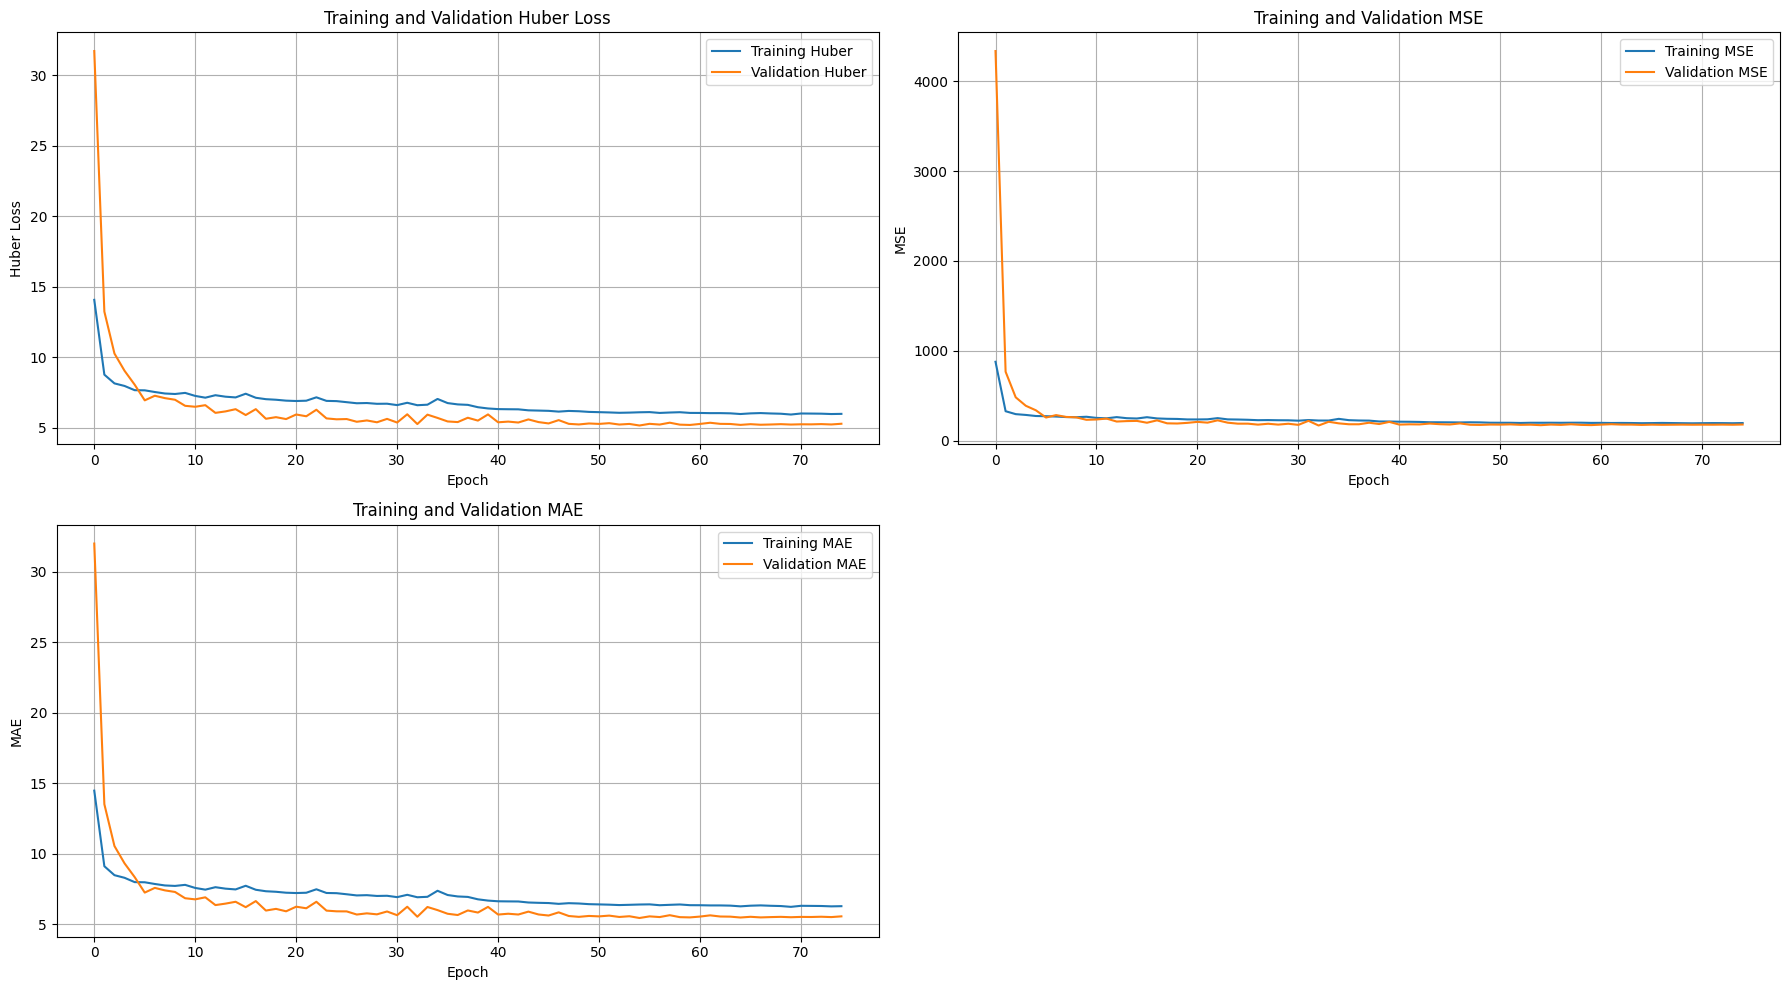

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # 2 rows, 2 columns

# Huber Loss curves
axes[0, 0].plot(history.history['loss'], label='Training Huber')
axes[0, 0].plot(history.history['val_loss'], label='Validation Huber')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Huber Loss')
axes[0, 0].set_title('Training and Validation Huber Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# MSE curves
axes[0, 1].plot(history.history['mse'], label='Training MSE')
axes[0, 1].plot(history.history['val_mse'], label='Validation MSE')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_title('Training and Validation MSE')
axes[0, 1].legend()
axes[0, 1].grid(True)

# MAE curves
axes[1, 0].plot(history.history['mae'], label='Training MAE')
axes[1, 0].plot(history.history['val_mae'], label='Validation MAE')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('Training and Validation MAE')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Hide the unused subplot (bottom right)
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig(output_dir+'/fnn_training.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Evaluate the Model

In [102]:
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# Custom accuracy within tolerance
tolerance = 0.10  # 10% tolerance

# Training metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)


# Testing metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)


report = []
report.append("="*60)
report.append("FEEDFORWARD NEURAL NETWORK - RESULTS")
report.append("="*60)
report.append("\nTraining Set:")
report.append(f"  MSE:  {train_mse:.4f}")
report.append(f"  RMSE: {train_rmse:.4f}")
report.append(f"  MAE:  {train_mae:.4f}")
report.append(f"  R²:   {train_r2:.4f}")
report.append("\nTest Set:")
report.append(f"  MSE:  {test_mse:.4f}")
report.append(f"  RMSE: {test_rmse:.4f}")
report.append(f"  MAE:  {test_mae:.4f}")
report.append(f"  R²:   {test_r2:.4f}")
report.append("="*60)

report_text = "\n".join(report)

print("\n" + report_text)
report_path = os.path.join(output_dir, "fnn_test_results.txt")
with open(report_path, "w") as f:
    f.write(report_text)

1390/1390 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

FEEDFORWARD NEURAL NETWORK - RESULTS

Training Set:
  MSE:  171.4460
  RMSE: 13.0937
  MAE:  5.5804
  R²:   0.8834

Test Set:
  MSE:  180.9100
  RMSE: 13.4503
  MAE:  5.6740
  R²:   0.8364


Plotting Evaluation

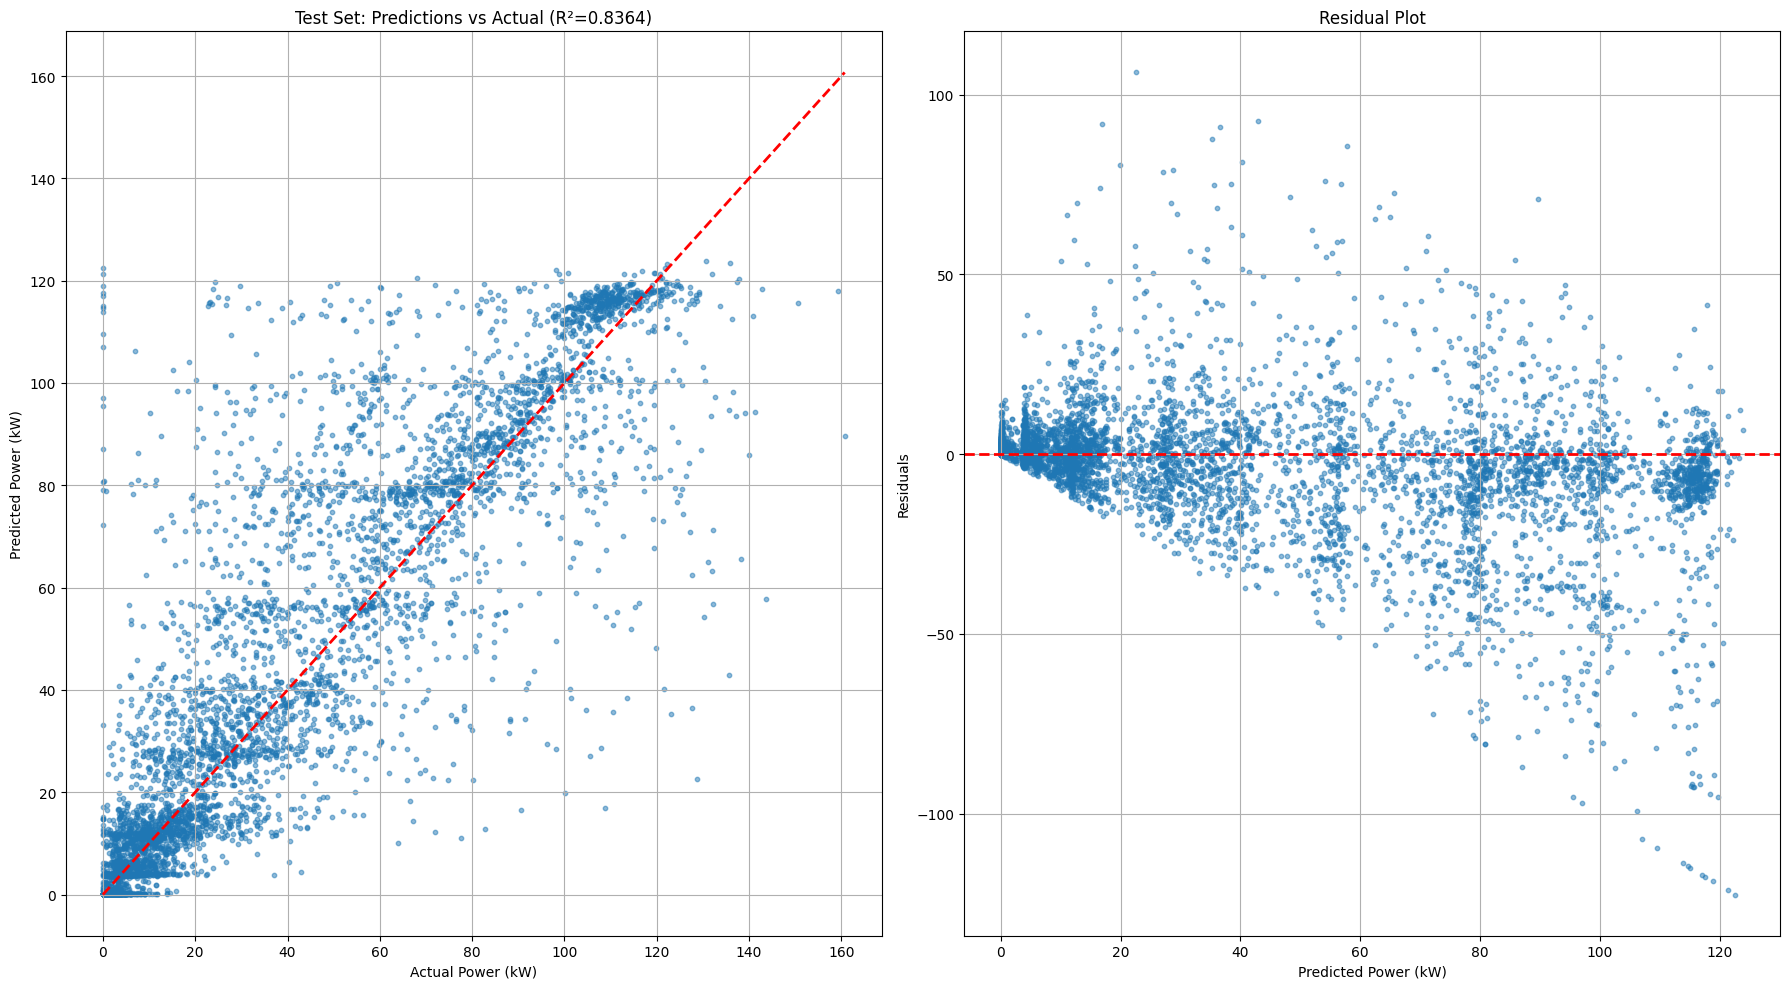

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # 1 rows, 2 columns

# Predictions vs Actual (Test Set)
axes[0].scatter(y_test, y_pred_test, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Power (kW)')
axes[0].set_ylabel('Predicted Power (kW)')
axes[0].set_title(f'Test Set: Predictions vs Actual (R²={test_r2:.4f})')
axes[0].grid(True)

# Residuals plot
y_test_flat = y_test.flatten()
y_pred_test_flat = y_pred_test.flatten()
residuals = y_test_flat - y_pred_test_flat
axes[1].scatter(y_pred_test_flat, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Power (kW)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True)

plt.tight_layout()
plt.savefig(output_dir + '/fnn_results.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Save the Model

In [104]:
model.save(output_dir + '/fnn_solar_final.h5')
print("\nModel saved as 'fnn_solar_final.h5'")


Model saved as 'fnn_solar_final.h5'
